In [1]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data
train_data = pd.read_csv("Diabetes/Train.csv")
test_data = pd.read_csv("Diabetes/Test.csv")

In [3]:
train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,164,82,43,67,32.8,0.341,50,False
1,4,90,0,0,0,28.0,0.610,31,False
2,1,138,82,0,0,40.1,0.236,28,False
3,4,110,92,0,0,37.6,0.191,30,False
4,2,93,64,32,160,38.0,0.674,23,True


In [4]:
train_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.801303,120.698697,69.097720,20.856678,78.412052,31.853746,0.464230,33.086319
std,3.401314,31.805415,19.301258,15.892553,113.145367,7.800839,0.311473,11.925163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.245250,24.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.367000,29.000000
75%,6.000000,139.000000,80.000000,32.000000,125.750000,36.400000,0.613750,40.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.288000,81.000000


In [5]:
header_data = train_data.columns.to_list()
header_data

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [6]:
# Quality Control
train_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
train_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
diff_class = train_data.groupby("Outcome").size().reset_index(name = "count").values
print(diff_class)

[[False 400]
 [True 214]]


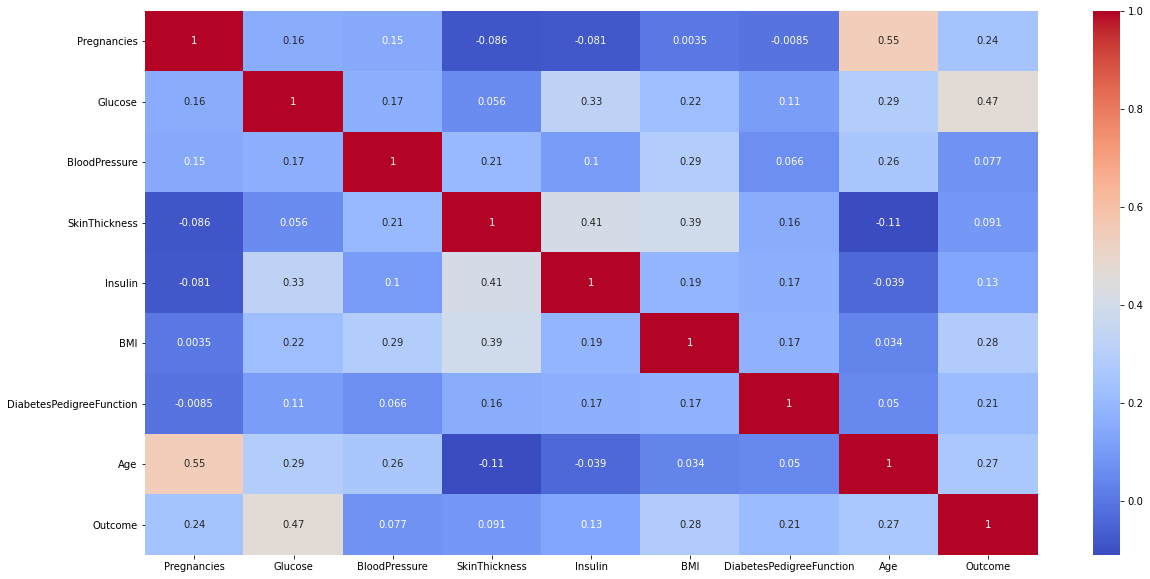

In [9]:
corr = train_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.show()

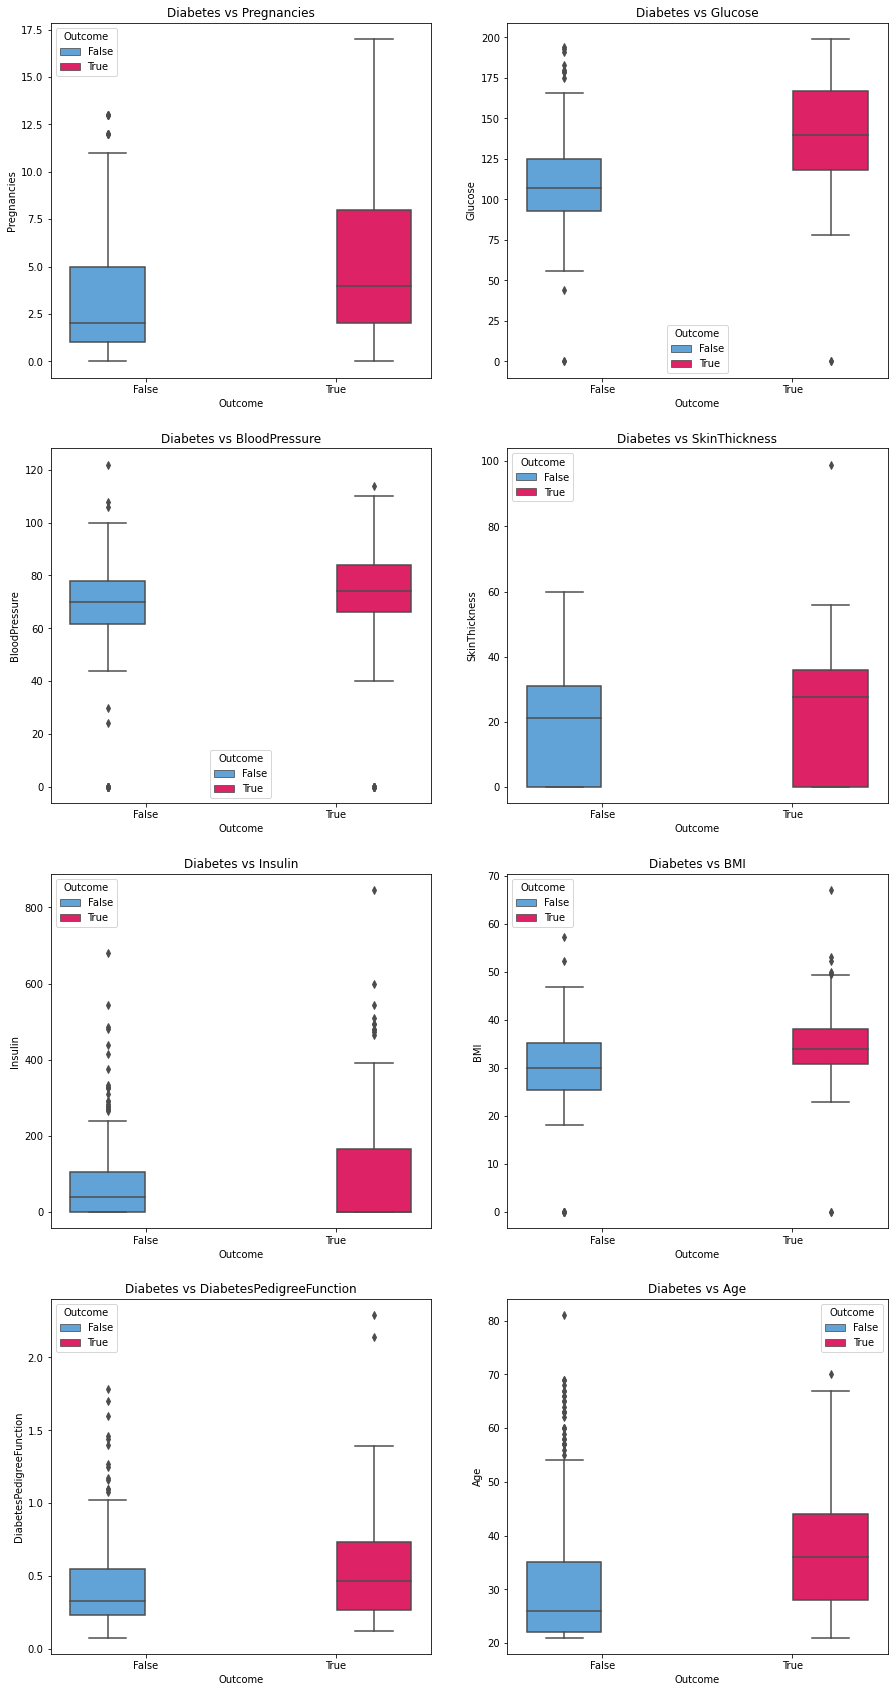

In [10]:
attrs_data = header_data[:-1]
fig, axes = plt.subplots(4, 2, figsize=(15, 30))

for idx in range(0, len(attrs_data), 2):
    sns.boxplot(ax=axes[int(idx/2), 0], x=train_data["Outcome"], y=train_data[attrs_data[idx]], hue=train_data["Outcome"], palette=('#4da4eb','#fc035e'))
    axes[int(idx/2), 0].set_title("Diabetes vs "+ attrs_data[idx], fontsize=12)
    sns.boxplot(ax=axes[int(idx/2), 1], x=train_data["Outcome"], y=train_data[attrs_data[idx+1]], hue=train_data["Outcome"], palette=('#4da4eb','#fc035e'))
    axes[int(idx/2), 1].set_title("Diabetes vs "+ attrs_data[idx+1], fontsize=12)

# 5.2

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv("Diabetes/Train.csv")
test_data = pd.read_csv("Diabetes/Test.csv")

header_data = train_data.columns.to_list()
col_means = train_data.mean(axis=0)
def make_categorical(data, header_data):
    for header in header_data[:-1]:
        minimum = data[header].min()
        mean = data[header].mean()
        maximum = data[header].max()
        bins = [minimum, mean, maximum]
        labels = ["low", "high"]
        data[header] = pd.cut(data[header], bins=bins, labels=labels, include_lowest=True)  
    return data
make_categorical(train_data, header_data)
make_categorical(test_data, header_data)
import math
def entropy(p=0, n=0):
    """This function gives the numbers of positive and negative samples
    and returns the entropy of the dataset."""
    s = p + n
    return 0 if p == 0 or n == 0 else -p/s*math.log2(p/s) - n/s*math.log2(n/s) 

def pseudo_info_gain(attribute, outcome):
    """
    This function gives the attribute and outcome columns and returns a measure.
    Returned measure determines the quality of the data division based on the given attribute.
    The measure is interpreted by the lower the measure, the better the quality.
    """
    lvl_1 = outcome[attribute == "low"]
    lvl_1_cls_count = lvl_1.value_counts()
    ent_1 = entropy(*lvl_1_cls_count)
    lvl_2 = outcome[attribute == "high"]
    lvl_2_cls_count = lvl_2.value_counts()
    ent_2 = entropy(*lvl_2_cls_count)
    lvl_1_count = lvl_1_cls_count.sum()
    lvl_2_count = lvl_2_cls_count.sum()
    s = lvl_1_count + lvl_2_count
    pseudo_info_gain = lvl_1_count/s*ent_1 + lvl_2_count/s*ent_2
#     print(attribute.name, pseudo_info_gain)
    return pseudo_info_gain

class DecisionTree():
    def __init__(self, max_depth):
        self.depth = 0
        self.max_depth = max_depth
    
    def best_split_attr(self, x, outcome):
        """
        This function give the feature matrix and outcome vector
        and returns the best attribute for splitting with maximum information gain.
        """
        min_gain = 1
        best_attr = None
        attributes = x.columns.to_list()
        for attr in attributes:
            gain = pseudo_info_gain(x[attr], outcome)
            if gain <= min_gain:
                min_gain = gain
                best_attr = attr
        return best_attr, min_gain
    
    def all_same(self, y):
        return y.eq(y.iloc[0]).all()
    
    def fit(self, x, y, param_node={}, depth=0):
        """
        This function gives the feature matrix, outcome vector, parameter node, and depth
        and returns the decision tree fitted on the given data.
        inputs:
        x: feature matrix
        y: outcome vector
        par_node: parameter node dictionary
        depth: depth integer
        """
        if y.size == 0:
            return None
        if x.size == 0:
            return {"value": y.mode()[0]}
        if self.all_same(y):
            return {"value": y.iloc[0]}
        if depth >= self.max_depth:
            return None
        else:
            attrs = x.columns.to_list()
            split_col = self.best_split_attr(x, y)[0]
            y_left = y[x[split_col] == "low"]
            y_right = y[x[split_col] == "high"] 
            child_attrs = attrs
            child_attrs.remove(split_col)
            x_left = x[x[split_col] == "low"]
            x_right = x[x[split_col] == "high"]
            param_node = {"splitting column": split_col, "value": y.mode()[0]}
            param_node["left"] = self.fit(x_left[child_attrs], y_left, {}, depth+1)
            param_node["right"] = self.fit(x_right[child_attrs], y_right, {}, depth+1)
            self.depth += 1
            self.dec_tree = param_node
            return param_node
        
    def query(self, sample):
        """
        This function predicts the outcome of a single sample.
        """
        pred_tree = self.dec_tree
        for itr in range(self.max_depth+1):
            left = pred_tree.get('left', None)
            right = pred_tree.get('right', None)
            if left == None and right == None:
                return pd.Series(pred_tree['value'])
            
            else:
                level = sample[pred_tree['splitting column']]
                if level == "low":
                    if left == None:
                        return pd.Series(pred_tree['value'])
                    else:
                        pred_tree = pred_tree['left']
                else:
                    if right == None:
                        return pd.Series(pred_tree['value'])
                    else:
                        pred_tree = pred_tree['right']
    def predict(self, x):
        """
        This function gives the feature matrix 
        and returns the predicted outcome for every sample in the matrix.
        """
        predictions = pd.Series(dtype=bool)
        for sample in x.iterrows():
            predictions = predictions.append(self.query(sample[1]), ignore_index=True)
        return predictions
        
    
outcome = train_data["Outcome"]  
max_depth = 5
clf = DecisionTree(max_depth)
m = clf.fit(train_data[header_data[:-1]], outcome)
from pprint import pprint
pprint(m)


{'left': {'left': {'left': {'left': {'left': None,
                                     'right': None,
                                     'splitting column': 'SkinThickness',
                                     'value': False},
                            'right': {'left': None,
                                      'right': {'value': False},
                                      'splitting column': 'SkinThickness',
                                      'value': False},
                            'splitting column': 'Age',
                            'value': False},
                   'right': {'left': {'left': None,
                                      'right': None,
                                      'splitting column': 'BloodPressure',
                                      'value': False},
                             'right': {'left': None,
                                       'right': None,
                                       'splitting column': 'Insulin',
          

# 5.3

In [13]:
def accuracy(predict, outcome):
    correct = predict == outcome
    return correct.sum()/outcome.size

train_data = pd.read_csv("Diabetes/Train.csv")
test_data = pd.read_csv("Diabetes/Test.csv")
header_data = train_data.columns.to_list()
make_categorical(train_data, header_data)
make_categorical(test_data, header_data)
train_acc_depth = {}
outcome_train = train_data["Outcome"]
train_data = train_data[header_data[:-1]]
test_acc_depth = {}
outcome_test = test_data["Outcome"]
test_data = test_data[header_data[:-1]]
for max_depth in range(1, 9):
    clf = DecisionTree(max_depth)
    clf.fit(train_data, outcome_train)
    train_acc_depth[str(max_depth)] = accuracy(clf.predict(train_data), outcome_train)
    test_acc_depth[str(max_depth)] = accuracy(clf.predict(test_data), outcome_test)
    
    
    

In [14]:
train_acc_depth

{'1': 0.6514657980456026,
 '2': 0.6986970684039088,
 '3': 0.7361563517915309,
 '4': 0.7361563517915309,
 '5': 0.754071661237785,
 '6': 0.7719869706840391,
 '7': 0.7833876221498371,
 '8': 0.8094462540716613}

In [15]:
test_acc_depth

{'1': 0.6493506493506493,
 '2': 0.7207792207792207,
 '3': 0.7207792207792207,
 '4': 0.7207792207792207,
 '5': 0.6948051948051948,
 '6': 0.7272727272727273,
 '7': 0.6883116883116883,
 '8': 0.7402597402597403}

Text(0.5, 0, 'Tree Depth')

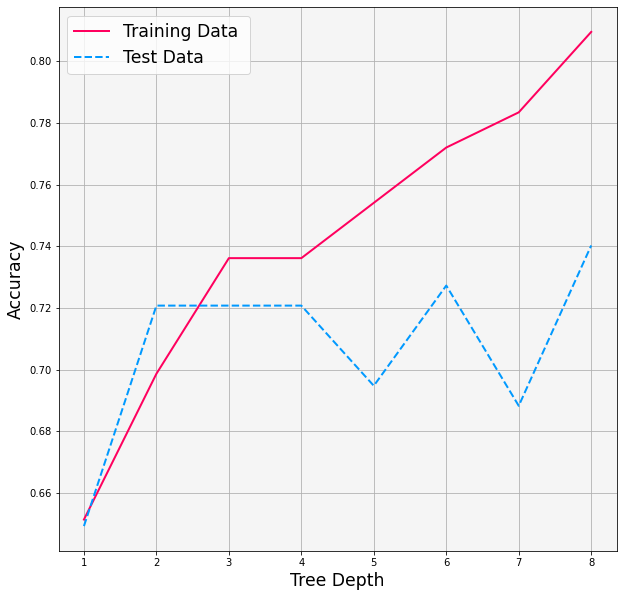

In [16]:
fig, ax= plt.subplots(figsize=(10, 10))
ax.plot(train_acc_depth.keys(), train_acc_depth.values(), label="Training Data ", color="#FF005E", linewidth=2)
ax.plot(test_acc_depth.keys(), test_acc_depth.values(), color= "#0099FF", label="Test Data", linestyle="--", lw= 2)
# ax.set_xlim(0, 500)
ax.grid(True)
ax.legend(fontsize="xx-large")
ax.set_facecolor('#f5f5f5')
ax.set_ylabel("Accuracy", fontsize="xx-large")
ax.set_xlabel("Tree Depth", fontsize="xx-large")

# 5.4

In [19]:
train_data = pd.read_csv("Diabetes/Train.csv")
test_data = pd.read_csv("Diabetes/Test.csv")
header_data = train_data.columns.to_list()
make_categorical(train_data, header_data)
make_categorical(test_data, header_data)
#shuffle the training data
train_data = train_data.sample(frac = 1).reset_index(drop = True)
n_samples = train_data.shape[0]
import numpy as np
boundaries = np.linspace(0, n_samples, 6, dtype=np.int64)
c_val_acc_depth = {}
for max_depth in range(1, 9):
    clf = DecisionTree(max_depth)
    valid_accs = []
    for idx in range(len(boundaries)-1):
        c_valid = train_data.iloc[boundaries[idx]:boundaries[idx+1]]
        c_train_data = train_data.drop(np.r_[boundaries[idx]:boundaries[idx+1]], axis= 0)
        c_valid_out = c_valid["Outcome"].reset_index(drop=True)
        c_valid_features = c_valid[header_data[:-1]].reset_index(drop=True)
        c_train_out = c_train_data["Outcome"].reset_index(drop=True)
        c_train_features = c_train_data[header_data[:-1]].reset_index(drop=True)
        clf.fit(c_train_features, c_train_out)
        valid_accs.append(accuracy(clf.predict(c_valid_features), c_valid_out))
    c_val_acc_depth[str(max_depth)] = np.array(valid_accs).mean()
print(c_val_acc_depth)
best_depth = int(max(c_val_acc_depth, key=c_val_acc_depth.get))
print("Best Depth:", best_depth)


{'1': 0.651499400239904, '2': 0.6987205117952818, '3': 0.7361988537918166, '4': 0.7117686258829802, '5': 0.7232040517126482, '6': 0.7036518725842995, '7': 0.6922431027588964, '8': 0.6841263494602159}
Best Depth: 3


In [20]:
outcome = train_data["Outcome"]
train_data = train_data[header_data[:-1]]
clf = DecisionTree(best_depth)
clf.fit(train_data, outcome)


{'splitting column': 'Glucose',
 'value': False,
 'left': {'splitting column': 'Pregnancies',
  'value': False,
  'left': {'splitting column': 'BMI',
   'value': False,
   'left': None,
   'right': None},
  'right': {'splitting column': 'DiabetesPedigreeFunction',
   'value': False,
   'left': None,
   'right': None}},
 'right': {'splitting column': 'BMI',
  'value': True,
  'left': {'splitting column': 'Age',
   'value': False,
   'left': None,
   'right': None},
  'right': {'splitting column': 'DiabetesPedigreeFunction',
   'value': True,
   'left': None,
   'right': None}}}

In [21]:
test_outcome = test_data["Outcome"]
test_data = test_data[header_data[:-1]]
predicts = clf.predict(test_data)

In [22]:
test_outcome

0       True
1       True
2       True
3       True
4       True
       ...  
149    False
150    False
151    False
152    False
153    False
Name: Outcome, Length: 154, dtype: bool

In [23]:
predicts

0      False
1      False
2      False
3       True
4      False
       ...  
149     True
150    False
151     True
152    False
153     True
Length: 154, dtype: bool

In [24]:
#Precision = TP/(TP+FP)
correct = test_outcome == predicts
tp = predicts[correct].sum()
tp_fp = predicts.sum()
precision = tp/tp_fp
print("Precision:", precision)

Precision: 0.627906976744186


In [25]:
#Recall = TP/(TP+FN)
wrong = test_outcome != predicts
fn = predicts[wrong].size - predicts[wrong].sum()
tp_fn = tp + fn
recall = tp/tp_fn
print("Recall:", recall)

Recall: 0.5


In [26]:
f_score = 2*precision*recall/(precision+recall)
print("f_score:", f_score)

f_score: 0.5567010309278351


In [27]:
#Sensitivity equals to Recall
sensitivity = recall
print("Sensitivity:", sensitivity)

Sensitivity: 0.5


In [28]:
#Specificity = TN/(TN+FP)
tn = predicts[correct].size - predicts[correct].sum()
fp = predicts[wrong].sum()
tn_fp = tn+fp
specificity = tn/(tn_fp)
print("Specificity:", specificity)

Specificity: 0.84


# PERCEPTRON

# 1 Stochastic Gradient Descent

In [202]:
#Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Data Preperation
train_data = pd.read_csv("Diabetes/Train.csv")
test_data = pd.read_csv("Diabetes/Test.csv")
train_data = train_data[train_data["BMI"] != 0]
train_data = train_data[train_data["Glucose"] != 0]
train_data = train_data[train_data["BloodPressure"] != 0]
train_data["Outcome"].replace([True, False], [1, -1], inplace=True)
train_data = train_data.reset_index(drop=True)
#Min-Max Scaler (Normalization)
headers = train_data.columns.to_list()
attrs = headers[:-1]
for attr in attrs:
    col_min = train_data[attr].min()
    col_max = train_data[attr].max()
    train_data[attr] = (train_data[attr] - col_min) / (col_max - col_min)
train_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,0.224017,0.500630,0.493691,0.219850,0.098288,0.288580,0.176751,0.202763,-0.316062
std,0.199791,0.196790,0.125150,0.157958,0.135714,0.138541,0.142697,0.200166,0.949559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.058824,0.358065,0.408163,0.000000,0.000000,0.189162,0.076697,0.050000,-1.000000
50%,0.176471,0.470968,0.489796,0.242424,0.056738,0.284254,0.134389,0.133333,-1.000000
75%,0.352941,0.619355,0.571429,0.333333,0.153664,0.373211,0.243891,0.325000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [203]:
#Train Validation Split
valid_data = train_data.sample(frac=0.15, random_state=42)
valid_indices = valid_data.index.to_list()
train_data.drop(index=valid_indices, inplace=True)
train_data.reset_index(drop=True, inplace=True)
valid_data.reset_index(drop=True, inplace=True)


In [204]:
train_expect = train_data["Outcome"]
train_feature = train_data.drop(labels="Outcome", axis=1)
train_feature.insert(0, "Ones", 1)
valid_expect= valid_ddef accuracy(predict, outcome):
    correct = predict == outcome
    return correct.sum()/outcome.size

def predict(x, w):
    return np.sign(x@w)[0]
ata["Outcome"]
valid_feature = valid_data.drop(labels="Outcome", axis = 1)
valid_feature.insert(0, "Ones", 1)

In [205]:
def accuracy(predict, outcome):
    correct = predict == outcome
    return correct.sum()/outcome.size

def predict(x, w):
    return np.sign(x@w)[0]


In [230]:
def fit(train_feature, train_expect, n_iteration= 100, learning_rate=0.01):
    iter_weights = {}
    d = train_feature.iloc[0].shape[0]
    w = np.zeros((d, 1))
    n = train_feature.shape[0]
    for t in range(n_iteration):
        i = t%n
        x = train_feature.iloc[i]
        y = train_expect.iloc[i]
        y_hat = predict(x, w)
        if y_hat != y:
            w = w + learning_rate*x.values.reshape((x.size, 1))*y
        iter_weights[str(t)] = w
    return iter_weights
iter_weights = fit(train_feature, train_expect, n_iteration=500)

In [231]:
def evaluate(valid_feature, valid_expect, iter_weights):
    iter_acc = {}
    max_accr, best_weight = 0, None
    for iteration, weight in iter_weights.items():
        accr = accuracy(predict(valid_feature, weight), valid_expect)
        if int(iteration) % 10 == 0:
            iter_acc[iteration] = accr
        if accr > max_accr:
            max_accr = accr
            best_weight = weight
    return iter_acc, best_weight, max_accr

In [232]:
iter_acc, weight, max_accr = evaluate(valid_feature, valid_expect, iter_weights)

Text(0.5, 0, 'Iteration')

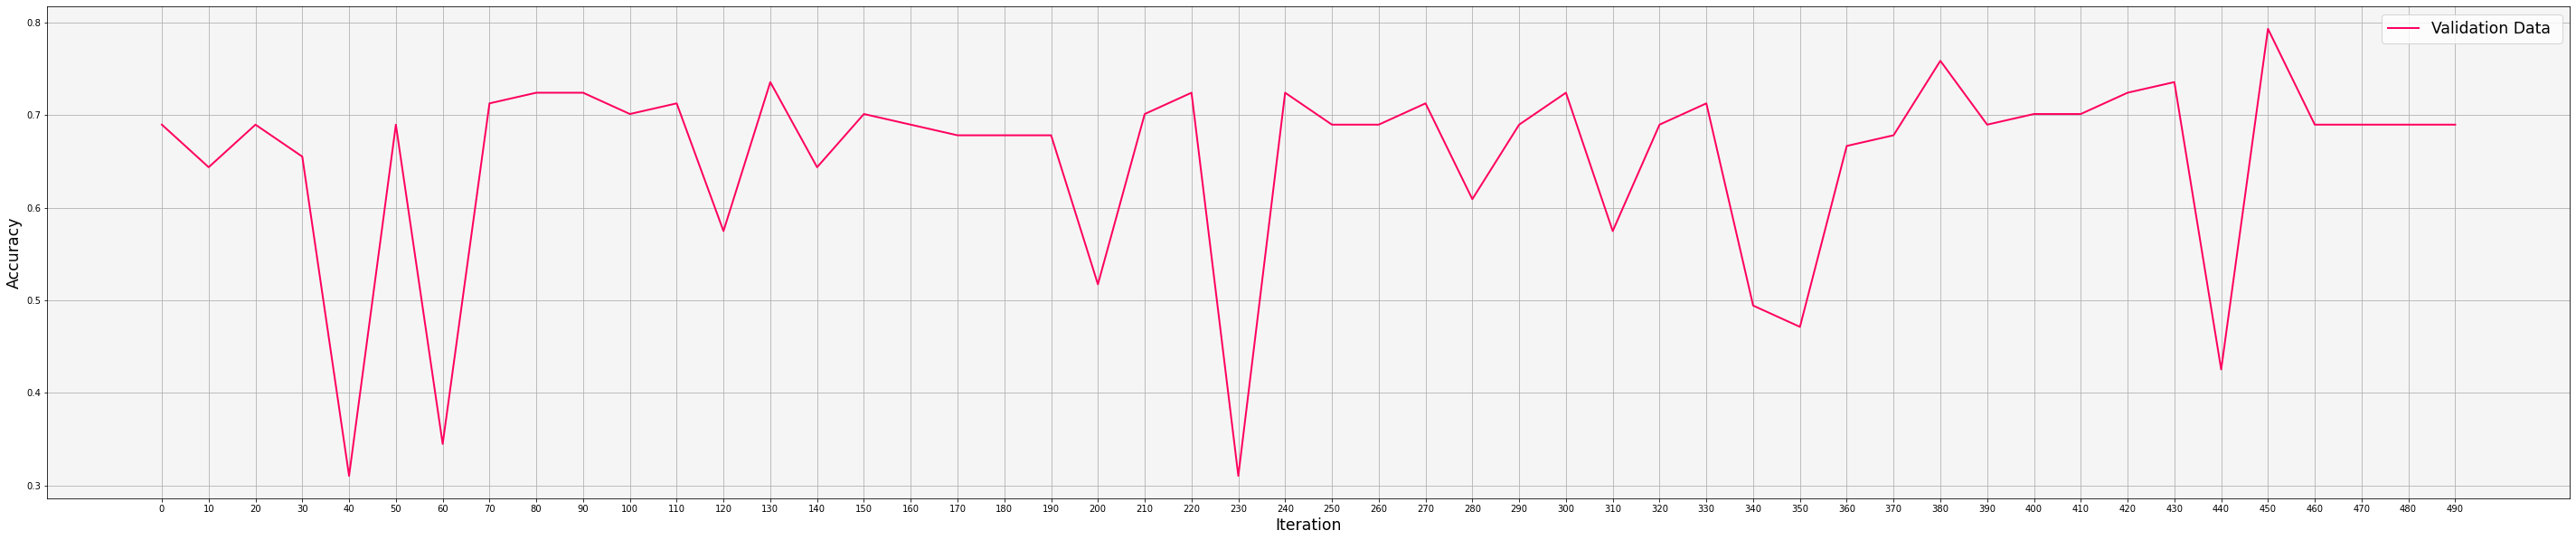

In [243]:
fig, ax= plt.subplots(figsize=(50, 10))
ax.plot(iter_acc.keys(), iter_acc.values(), label="Validation Data ", color="#FF005E", linewidth=2)
ax.grid(True)
ax.legend(fontsize="xx-large")
ax.set_facecolor('#f5f5f5')
ax.set_ylabel("Accuracy", fontsize="xx-large")
ax.set_xlabel("Iteration", fontsize="xx-large")

In [244]:
test_data = test_data[test_data["BMI"] != 0]
test_data = test_data[test_data["Glucose"] != 0]
test_data = test_data[test_data["BloodPressure"] != 0]
test_data["Outcome"].replace([True, False], [1, -1], inplace=True)
test_data = test_data.reset_index(drop=True)
for attr in attrs:
    col_min = test_data[attr].min()
    col_max = test_data[attr].max()
    test_data[attr] = (test_data[attr] - col_min) / (col_max - col_min)
test_expect = test_data["Outcome"]
test_feature = test_data.drop(labels="Outcome", axis = 1)
test_feature.insert(0, "Ones", 1)
predicts = predict(test_feature, weight)


In [245]:
#Precision = TP/(TP+FP)
correct = predicts == test_expect
tp = predicts[correct] == 1
tp = tp.sum()
tp_fp = predicts == 1
tp_fp = tp_fp.sum()
precision = tp/tp_fp
print("Precision:", precision)


Precision: 0.7045454545454546


In [246]:
#Recall = TP/(TP+FN)
wrong = predicts != test_expect
fn = predicts[wrong]
fn = fn == -1
fn = fn.sum()
tp_fn = tp+fn
recall = tp/tp_fn
print("Recall:", recall)

Recall: 0.62


In [247]:
f_score = 2*precision*recall/(precision+recall)
print("f_score:", f_score)

f_score: 0.6595744680851063


In [248]:
#Sensitivity equals to Recall
sensitivity = recall
print("Sensitivity:", sensitivity)

Sensitivity: 0.62


In [251]:
#Specificity = TN/(TN+FP)
neg = predicts == -1
neg = neg.sum()
tn = neg - fn
pos = predicts == 1
pos = pos.sum()
fp = pos - tp
tn_fp = tn+fp
specificity = tn/(tn_fp)
print("Specificity:", specificity)

Specificity: 0.8470588235294118


# 2. Full Batch

In [1]:
#Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Data Preperation
train_data = pd.read_csv("Diabetes/Train.csv")
test_data = pd.read_csv("Diabetes/Test.csv")
train_data = train_data[train_data["BMI"] != 0]
train_data = train_data[train_data["Glucose"] != 0]
train_data = train_data[train_data["BloodPressure"] != 0]
test_data = test_data[test_data["BMI"] != 0]
test_data = test_data[test_data["Glucose"] != 0]
test_data = test_data[test_data["BloodPressure"] != 0]
train_data["Outcome"].replace([True, False], [1, -1], inplace=True)
train_data = train_data.reset_index(drop=True)
test_data["Outcome"].replace([True, False], [1, -1], inplace=True)
test_data = test_data.reset_index(drop=True)
#Min-Max Scaler (Normalization)
headers = train_data.columns.to_list()
attrs = headers[:-1]
for attr in attrs:
    col_min = train_data[attr].min()
    col_max = train_data[attr].max()
    train_data[attr] = (train_data[attr] - col_min) / (col_max - col_min)
for attr in attrs:
    col_min = test_data[attr].min()
    col_max = test_data[attr].max()
    test_data[attr] = (test_data[attr] - col_min) / (col_max - col_min)
train_data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,0.224017,0.500630,0.493691,0.219850,0.098288,0.288580,0.176751,0.202763,-0.316062
std,0.199791,0.196790,0.125150,0.157958,0.135714,0.138541,0.142697,0.200166,0.949559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.058824,0.358065,0.408163,0.000000,0.000000,0.189162,0.076697,0.050000,-1.000000
50%,0.176471,0.470968,0.489796,0.242424,0.056738,0.284254,0.134389,0.133333,-1.000000
75%,0.352941,0.619355,0.571429,0.333333,0.153664,0.373211,0.243891,0.325000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2]:
#Train Validation Split
valid_data = train_data.sample(frac=0.15, random_state=42)
valid_indices = valid_data.index.to_list()
train_data.drop(index=valid_indices, inplace=True)
train_data.reset_index(drop=True, inplace=True)
valid_data.reset_index(drop=True, inplace=True)
train_expect = train_data["Outcome"]
train_feature = train_data[attrs]
train_feature.insert(0, "Ones", 1)


In [3]:
def predict(x, w):
    return np.sign(x@w)[0]

In [4]:
#Full Batch
def fit(feature, expect, n_epoch=10, learning_rate=0.01):
    epoch_weight = {}
    d = feature.shape[1]
    w = np.random.random((d, 1))
    for epoch in range(1, n_epoch+1):
        x = feature
        y = expect
        y_hat = predict(x, w)
        wrong = y_hat != y
        x = x[wrong]
        y = y[wrong]
        w = w + (learning_rate*x.T@y).values.reshape((d, 1))
        epoch_weight[str(epoch)] = w
    return epoch_weight
        
epoch_weights = fit(train_feature, train_expect, n_epoch=20)
train_feature

,Ones,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,0.058824,0.774194,0.591837,0.434343,0.079196,0.298569,0.119005,0.483333
1,1,0.058824,0.606452,0.591837,0.000000,0.000000,0.447853,0.071493,0.116667
2,1,0.117647,0.316129,0.408163,0.323232,0.189125,0.404908,0.269683,0.033333
3,1,0.058824,0.367742,0.265306,0.151515,0.042553,0.122699,0.202715,0.083333
4,1,0.117647,0.438710,0.520408,0.323232,0.000000,0.357873,0.031674,0.000000
...,...,...,...,...,...,...,...,...,...
487,1,0.117647,0.541935,0.551020,0.373737,0.215130,0.513292,0.518552,0.166667
488,1,0.058824,0.961290,0.265306,0.161616,0.443262,0.157464,0.261086,0.050000
489,1,0.058824,0.361290,0.428571,0.151515,0.066194,0.110429,0.266063,0.083333
490,1,0.294118,0.638710,0.551020,0.000000,0.000000,0.548057,0.050679,0.433333


Text(0.5, 0, 'Epoch')

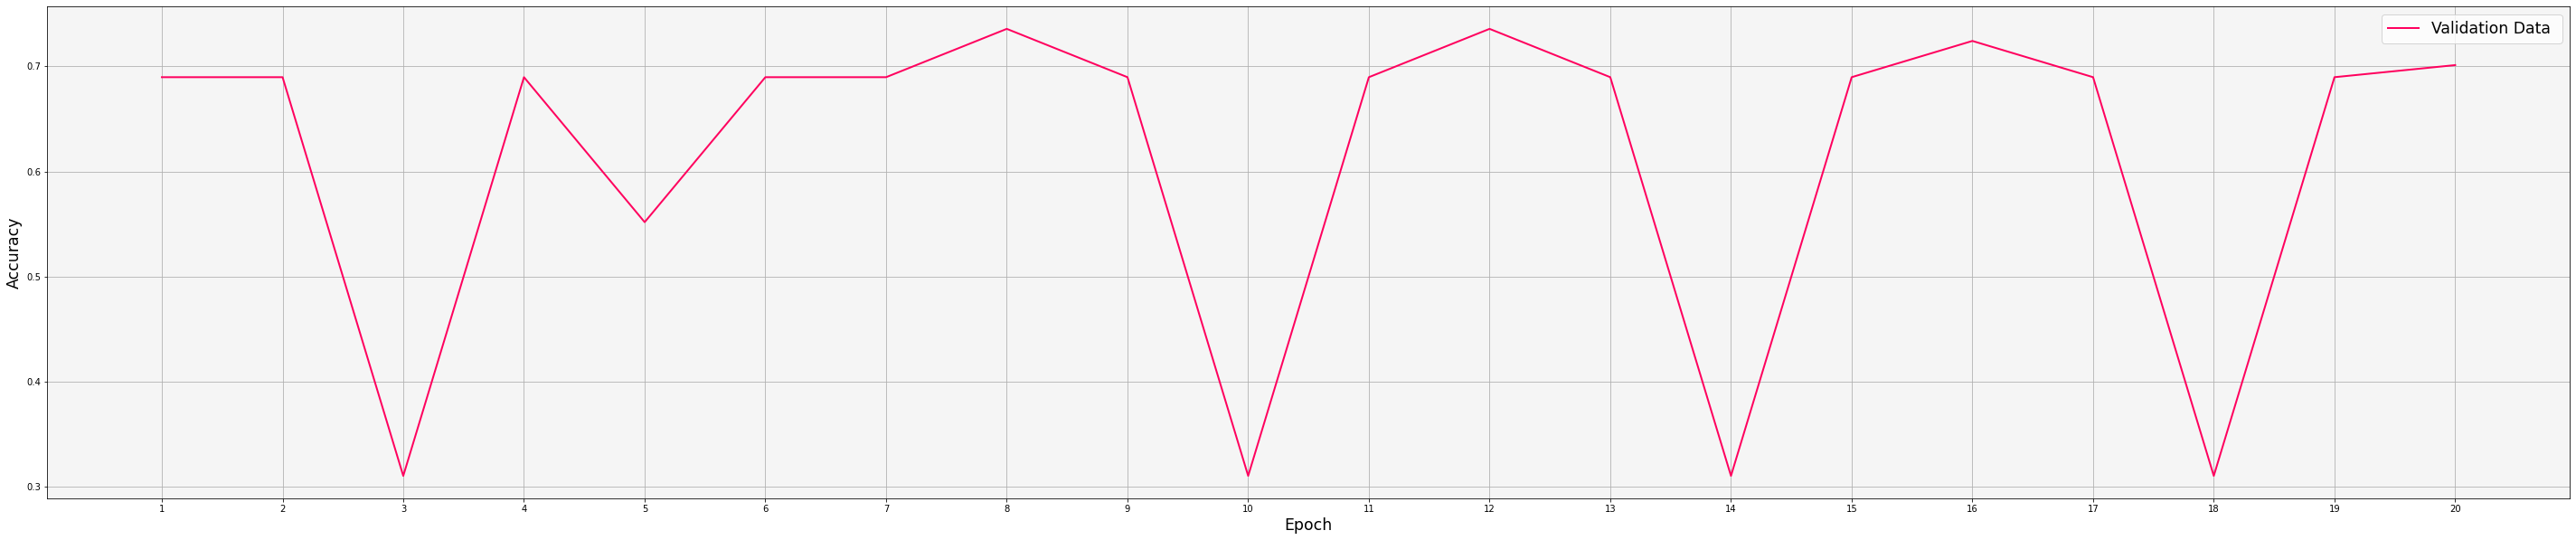

In [5]:
def accuracy(predict, outcome):
    correct = predict == outcome
    return correct.sum()/outcome.size

def evaluate(valid_feature, valid_expect, epoch_weights):
    epoch_acc = {}
    max_accr, best_weight = 0, None
    for epoch, weight in epoch_weights.items():
        accr = accuracy(predict(valid_feature, weight), valid_expect)
        epoch_acc[epoch] = accr
        if accr > max_accr:
            max_accr = accr
            best_weight = weight
    return epoch_acc, best_weight, max_accr

valid_expect = valid_data["Outcome"]
valid_feature = valid_data.drop(labels="Outcome", axis=1)
valid_feature.insert(0, "Ones", 1)
 
epoch_acc, best_weight, max_accr = evaluate(valid_feature, valid_expect, epoch_weights)

fig, ax= plt.subplots(figsize=(50, 10))
ax.plot(epoch_acc.keys(), epoch_acc.values(), label="Validation Data ", color="#FF005E", linewidth=2)
ax.grid(True)
ax.legend(fontsize="xx-large")
ax.set_facecolor('#f5f5f5')
ax.set_ylabel("Accuracy", fontsize="xx-large")
ax.set_xlabel("Epoch", fontsize="xx-large")

In [6]:
test_expect = test_data["Outcome"]
test_feature = test_data.drop(labels="Outcome", axis = 1)
test_feature.insert(0, "Ones", 1)
predicts = predict(test_feature, best_weight)


In [7]:
#Precision = TP/(TP+FP)
correct = predicts == test_expect
tp = predicts[correct] == 1
tp = tp.sum()
tp_fp = predicts == 1
tp_fp = tp_fp.sum()
precision = tp/tp_fp
print("Precision:", precision)


Precision: 0.4666666666666667


In [8]:
#Recall = TP/(TP+FN)
wrong = predicts != test_expect
fn = predicts[wrong]
fn = fn == -1
fn = fn.sum()
tp_fn = tp+fn
recall = tp/tp_fn
print("Recall:", recall)

Recall: 0.8235294117647058


In [9]:
f_score = 2*precision*recall/(precision+recall)
print("f_score:", f_score)

f_score: 0.5957446808510638


In [10]:
#Sensitivity equals to Recall
sensitivity = recall
print("Sensitivity:", sensitivity)

Sensitivity: 0.8235294117647058


In [11]:
#Specificity = TN/(TN+FP)
neg = predicts == -1
neg = neg.sum()
tn = neg - fn
pos = predicts == 1
pos = pos.sum()
fp = pos - tp
tn_fp = tn+fp
specificity = tn/(tn_fp)
print("Specificity:", specificity)

Specificity: 0.48936170212765956


# 3. Mini Batch

In [48]:
#Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Data Preperation
train_data = pd.read_csv("Diabetes/Train.csv")
test_data = pd.read_csv("Diabetes/Test.csv")
train_data = train_data[train_data["BMI"] != 0]
train_data = train_data[train_data["Glucose"] != 0]
train_data = train_data[train_data["BloodPressure"] != 0]
test_data = test_data[test_data["BMI"] != 0]
test_data = test_data[test_data["Glucose"] != 0]
test_data = test_data[test_data["BloodPressure"] != 0]
train_data["Outcome"].replace([True, False], [1, -1], inplace=True)
train_data = train_data.reset_index(drop=True)
test_data["Outcome"].replace([True, False], [1, -1], inplace=True)
test_data = test_data.reset_index(drop=True)
#Min-Max Scaler (Normalization)
headers = train_data.columns.to_list()
attrs = headers[:-1]
for attr in attrs:
    col_min = train_data[attr].min()
    col_max = train_data[attr].max()
    train_data[attr] = (train_data[attr] - col_min) / (col_max - col_min)
for attr in attrs:
    col_min = test_data[attr].min()
    col_max = test_data[attr].max()
    test_data[attr] = (test_data[attr] - col_min) / (col_max - col_min)
train_data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,0.224017,0.500630,0.493691,0.219850,0.098288,0.288580,0.176751,0.202763,-0.316062
std,0.199791,0.196790,0.125150,0.157958,0.135714,0.138541,0.142697,0.200166,0.949559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.058824,0.358065,0.408163,0.000000,0.000000,0.189162,0.076697,0.050000,-1.000000
50%,0.176471,0.470968,0.489796,0.242424,0.056738,0.284254,0.134389,0.133333,-1.000000
75%,0.352941,0.619355,0.571429,0.333333,0.153664,0.373211,0.243891,0.325000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
#Train Validation Split
valid_data = train_data.sample(frac=0.15, random_state=42)
valid_indices = valid_data.index.to_list()
train_data.drop(index=valid_indices, inplace=True)
train_data.reset_index(drop=True, inplace=True)
valid_data.reset_index(drop=True, inplace=True)
train_expect = train_data["Outcome"]
train_feature = train_data[attrs]
train_feature.insert(0, "Ones", 1)


In [50]:
def predict(x, w):
    return np.sign(x@w)[0]

In [ ]:
#Mini Batch
def fit(feature, expect, n_epoch=10, learning_rate=0.01, n_batch=5):
    batch = 1
    batch_weight = {}
    d = feature.shape[1]
    w = np.random.random((d, 1))
    n = train_feature.shape[0]
    indices = np.linspace(0, n, num= n_batch+1, dtype=np.int32)
    for epoch in range(1, n_epoch+1):
        random_state = np.random.randint(51)
        feature = feature.sample(frac=1, random_state=random_state)
        expect = expect.sample(frac=1, random_state=random_state)
        for idx in range(len(indices)-1):
            x = feature.iloc[indices[idx]:indices[idx+1]]
            y = expect.iloc[indices[idx]:indices[idx+1]]
        y_hat = predict(x, w)
        wrong = y_hat != y
        x = x[wrong]
        y = y[wrong]
        w = w + (learning_rate*x.T@y).values.reshape((d, 1))
        batch_weight[str(batch)] = w
        batch += 1
    return batch_weight
        
batch_weights = fit(train_feature, train_expect, n_epoch=20)


Text(0.5, 0, 'Batch')

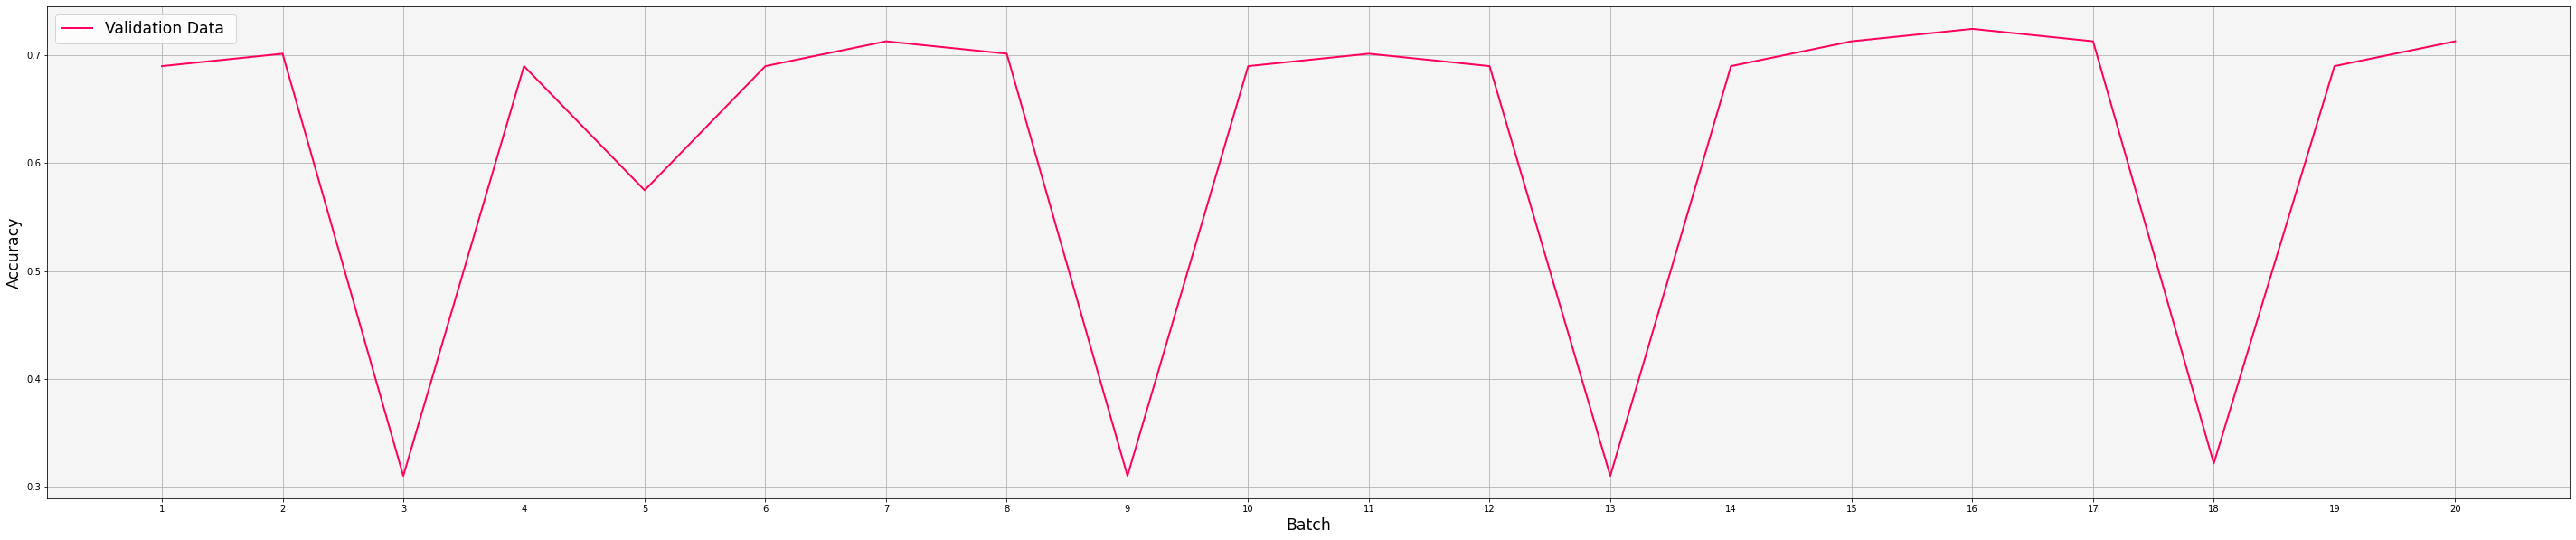

In [55]:
def accuracy(predict, outcome):
    correct = predict == outcome
    return correct.sum()/outcome.size

def evaluate(valid_feature, valid_expect, batch_weights):
    batch_acc = {}
    max_accr, best_weight = 0, None
    for batch, weight in epoch_weights.items():
        accr = accuracy(predict(valid_feature, weight), valid_expect)
        batch_acc[batch] = accr
        if accr > max_accr:
            max_accr = accr
            best_weight = weight
    return batch_acc, best_weight, max_accr

valid_expect = valid_data["Outcome"]
valid_feature = valid_data.drop(labels="Outcome", axis=1)
valid_feature.insert(0, "Ones", 1)
 
batch_acc, best_weight, max_accr = evaluate(valid_feature, valid_expect, epoch_weights)

fig, ax= plt.subplots(figsize=(50, 10))
ax.plot(batch_acc.keys(), batch_acc.values(), label="Validation Data ", color="#FF005E", linewidth=2)
ax.grid(True)
ax.legend(fontsize="xx-large")
ax.set_facecolor('#f5f5f5')
ax.set_ylabel("Accuracy", fontsize="xx-large")
ax.set_xlabel("Batch", fontsize="xx-large")

In [56]:
test_expect = test_data["Outcome"]
test_feature = test_data.drop(labels="Outcome", axis = 1)
test_feature.insert(0, "Ones", 1)
predicts = predict(test_feature, best_weight)


In [57]:
#Precision = TP/(TP+FP)
correct = predicts == test_expect
tp = predicts[correct] == 1
tp = tp.sum()
tp_fp = predicts == 1
tp_fp = tp_fp.sum()
precision = tp/tp_fp
print("Precision:", precision)


Precision: 0.5405405405405406


In [58]:
#Recall = TP/(TP+FN)
wrong = predicts != test_expect
fn = predicts[wrong]
fn = fn == -1
fn = fn.sum()
tp_fn = tp+fn
recall = tp/tp_fn
print("Recall:", recall)

Recall: 0.7843137254901961


In [59]:
f_score = 2*precision*recall/(precision+recall)
print("f_score:", f_score)

f_score: 0.6399999999999999


In [60]:
#Sensitivity equals to Recall
sensitivity = recall
print("Sensitivity:", sensitivity)

Sensitivity: 0.7843137254901961


In [61]:
#Specificity = TN/(TN+FP)
neg = predicts == -1
neg = neg.sum()
tn = neg - fn
pos = predicts == 1
pos = pos.sum()
fp = pos - tp
tn_fp = tn+fp
specificity = tn/(tn_fp)
print("Specificity:", specificity)

Specificity: 0.6382978723404256
